# Libraries

In [8]:
pip install riotwatcher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 1.2 MB/s eta 0:00:00


API found at https://developer.riotgames.com/

list of apis https://developer.riotgames.com/apis

In [9]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part A: Collection

In [48]:
# global variables
api_key = 'RGAPI-53e44c44-f459-4bc6-9c88-72fa8dd33304'
watcher = LolWatcher(api_key)

# first entry is summoner name (username), second is PUUID, and third is NOT server but region (americas, asia, europe, or esports)
# server is na1, euw1, kr, etc.

# first half of data (request overload): pro data/high elo
summoner_info_pro = {0 : ['역천괴','HXXcmPG5mKETeTvMkA_T3rv5gKGhz8wogsCUWv0aNdKKrSBKe20_NokHFi3KUqexkA-Jsmqr7KRohg', 'asia'],
                  1 : ['Hide on bush', '9mTvANPkfm_ehL1RWAavzJZ7Ctd9xGnThpgN8QZLISdr-KMEFPK_c3sorNJ7SSMnkxDmhQpJLUhETA', 'asia'],
                  2 : ['T1 Gumayusi', 'NHvBUFjBoPkeg2YNKtbGnZAJ57tr5RanqJksuMely_FoK8HETjCht6J4utQOD8gbvBOKP0Gqg4r1PQ', 'asia'],
                  3 : ['DouyinTonyTop', 'JVoKe_2_L1Jz4Yosn2nyQJcDR0xF1jvZaCj9Sa9TKsy72G_8wsGmT9yIzyUYtkHqMsvcbQ3sA2Onzw', 'americas'],
                  4 : ['jamican banana', '2hYuhnqt0QGURvf_ij-cK2dZambeerWYG29To0PxXKBBz36lP_zALzT9q80fMLfiJilZB0Yri4rTqg', 'americas'],
                  5 : ['Drututt', 'xBBRpdjZRGrS_tnPHaicjzJ5pu2VZirfLDNrdb9JZrUaagcqK3guFXNM_pM_el2ibo7_1aDrCFibkw', 'europe'],
                  6 : ['AERO EROS FLAME', 'tYEF9oARHgcjTp6qy0dTEAfbXM0v2eQK13nJGsbqyMMKo7XkUmnkJ8qYY06AX2oUbHSQqc3oeWkbSQ', 'europe'],
                  7 : ['5aivarrs', 'bdyR1DwvgRFJYrHiEu_vlW5ZRfR12CMkflA-EAkPaNNRT_Yt8kUVTHCKxRZw180Ewi4wEYHF6eOlRg', 'europe']
}

summoner_info_pro[5][1]

'xBBRpdjZRGrS_tnPHaicjzJ5pu2VZirfLDNrdb9JZrUaagcqK3guFXNM_pM_el2ibo7_1aDrCFibkw'

In [57]:
# i can't get that many requests that fast so i need to break my data up and merge later
# amateur data/low elo
summoner_info_amateur = {0 : ['staticcasttype', 'smgDcZQRcPVnIJJUIdn-cyLhMtOzWW1pYub1fkK_inI8_Wh2hFK7q3deneMNRnYxhMa5Pvw-u9MGdQ', 'americas'],
                  1 : ['binchicken', 'vZOoJBb5_Wy6LJCr0jcS4GWfdg9CH5gBJJDEHdCBMLM5vjUSARdZ4oWH-6wqjCs-rxlIusxDIFUFHQ', 'americas'],
                  2 : ['Ryechus', 'HDC_2SprVQSVjgRt3rOJnY-tM_xenBR76x0fb1P5KODbLcN0ZPiI3zZJ1a5UkJXE8pqRxmX_AJQ3eQ', 'americas'],
                  3 : ['alphabetcat', 'hTuGHUYHBLnVZzV_XzBhTbVS1AkbXIttIxB6UsLat58TN3OuchROJHTHxeHL31Nz2GmsL8TrhiXleg', 'americas'],
                  4 : ['white ibis', 'CcEZ4CeuM5hZn9GQW_QUKkljXhHkQlzJ6mOGA36urZ9QlRi33OI7I9H4oTUoCxQ_v-BLThQQy3m6JA', 'americas'],
                  5 : ['mik025olaj', 'Q57aHNu3sQtiYRBvXUYW4F4bD2ACDaRE3ITo_EB5SF-qKUC0ttS26IOnTp2-BNWmXa_D8_ziyElRYw', 'europe'],
                  6 : ['남생이롤', 'KkpXWHaS_jwKFtf3LE_GDR8TnOWYQk7GQPkYodTyo-2mlwo9EK78pQhum7KHV79TPzVrZXX3ofs1dw', 'asia'],
                  7 : ['내가낸데우얄껀데', 'w5KZLz7j0qd57wXWTM68TcNaofJ9Mp5Gdf23lziybYB4ipPKl_qLsPSXTuj5MYOTBUr69wkUHpGw9g', 'asia']
}

In [73]:
# need the combined for the loop later on
puuids = ['HXXcmPG5mKETeTvMkA_T3rv5gKGhz8wogsCUWv0aNdKKrSBKe20_NokHFi3KUqexkA-Jsmqr7KRohg', '9mTvANPkfm_ehL1RWAavzJZ7Ctd9xGnThpgN8QZLISdr-KMEFPK_c3sorNJ7SSMnkxDmhQpJLUhETA',
          'NHvBUFjBoPkeg2YNKtbGnZAJ57tr5RanqJksuMely_FoK8HETjCht6J4utQOD8gbvBOKP0Gqg4r1PQ', 'JVoKe_2_L1Jz4Yosn2nyQJcDR0xF1jvZaCj9Sa9TKsy72G_8wsGmT9yIzyUYtkHqMsvcbQ3sA2Onzw'
          '2hYuhnqt0QGURvf_ij-cK2dZambeerWYG29To0PxXKBBz36lP_zALzT9q80fMLfiJilZB0Yri4rTqg', 'smgDcZQRcPVnIJJUIdn-cyLhMtOzWW1pYub1fkK_inI8_Wh2hFK7q3deneMNRnYxhMa5Pvw-u9MGdQ',
          'vZOoJBb5_Wy6LJCr0jcS4GWfdg9CH5gBJJDEHdCBMLM5vjUSARdZ4oWH-6wqjCs-rxlIusxDIFUFHQ', 'HDC_2SprVQSVjgRt3rOJnY-tM_xenBR76x0fb1P5KODbLcN0ZPiI3zZJ1a5UkJXE8pqRxmX_AJQ3eQ',
          'hTuGHUYHBLnVZzV_XzBhTbVS1AkbXIttIxB6UsLat58TN3OuchROJHTHxeHL31Nz2GmsL8TrhiXleg', 'CcEZ4CeuM5hZn9GQW_QUKkljXhHkQlzJ6mOGA36urZ9QlRi33OI7I9H4oTUoCxQ_v-BLThQQy3m6JA',
          'xBBRpdjZRGrS_tnPHaicjzJ5pu2VZirfLDNrdb9JZrUaagcqK3guFXNM_pM_el2ibo7_1aDrCFibkw', 'tYEF9oARHgcjTp6qy0dTEAfbXM0v2eQK13nJGsbqyMMKo7XkUmnkJ8qYY06AX2oUbHSQqc3oeWkbSQ',
          'bdyR1DwvgRFJYrHiEu_vlW5ZRfR12CMkflA-EAkPaNNRT_Yt8kUVTHCKxRZw180Ewi4wEYHF6eOlRg', 'Q57aHNu3sQtiYRBvXUYW4F4bD2ACDaRE3ITo_EB5SF-qKUC0ttS26IOnTp2-BNWmXa_D8_ziyElRYw',
          'KkpXWHaS_jwKFtf3LE_GDR8TnOWYQk7GQPkYodTyo-2mlwo9EK78pQhum7KHV79TPzVrZXX3ofs1dw', 'w5KZLz7j0qd57wXWTM68TcNaofJ9Mp5Gdf23lziybYB4ipPKl_qLsPSXTuj5MYOTBUr69wkUHpGw9g']

### Grabbing PUUID/acct stats 

This needs to be done individually for each account that you want to grab data for


In [56]:
# Retrieve the summoner's PUUID
server = 'eun1'
summoner_name = 'mik025olaj'

summoner = watcher.summoner.by_name(server, summoner_name)
puuid = summoner['puuid']
puuid

'Q57aHNu3sQtiYRBvXUYW4F4bD2ACDaRE3ITo_EB5SF-qKUC0ttS26IOnTp2-BNWmXa_D8_ziyElRYw'

In [ ]:
# # account general data retrieval
# me = watcher.summoner.by_name(server, summoner_name)
# print(me)

In [ ]:
# # all objects are returned (by default) as a dict
# # lets see if i got diamond yet (i probably didnt)
# my_ranked_stats = watcher.league.by_summoner(server, me['id'])
# print(my_ranked_stats)

### Making match id requests for match info

In [53]:
# Retrieve the summoner's match history
# Make a request to the Riot API to retrieve a list of match IDs for the specified PUUID
# url from riot api page: https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/HXXcmPG5mKETeTvMkA_T3rv5gKGhz8wogsCUWv0aNdKKrSBKe20_NokHFi3KUqexkA-Jsmqr7KRohg/ids?type=ranked&start=0&count=100&api_key=RGAPI-b011ea28-c1b1-4d7b-8dca-0426325bb69a
pro_matches = []
for user in range(8): # USE A MAGIC NUMBER HERE with how many instances are in the dictionary bc I didn't code this the best
  summoner_name = summoner_info_pro[user][0]
  region = summoner_info_pro[user][2]
  puuid = summoner_info_pro[user][1]
  matchlist_url = f'https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids'
  params = {'api_key': api_key}
  response = requests.get(matchlist_url, params=params)
  match_ids = response.json()
  print(match_ids)

  # Use the match IDs to retrieve the details for each match
  for match_id in match_ids:
      match_url = f'https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}'
      response = requests.get(match_url, params=params)
      match_data = response.json()
      pro_matches.append(match_data)

['KR_6426831914', 'KR_6426393479', 'KR_6426351819', 'KR_6426270942', 'KR_6426223498', 'KR_6425163421', 'KR_6425125350', 'KR_6425082830', 'KR_6425024766', 'KR_6419832703', 'KR_6419754790', 'KR_6418329392', 'KR_6418305972', 'KR_6418247046', 'KR_6418087821', 'KR_6417271695', 'KR_6417261944', 'KR_6416790167', 'KR_6416745332', 'KR_6416714698']
['KR_6427772801', 'KR_6427739827', 'KR_6426834135', 'KR_6426526287', 'KR_6426515078', 'KR_6426491023', 'KR_6426453727', 'KR_6426422137', 'KR_6426345907', 'KR_6426303170', 'KR_6425229662', 'KR_6425209803', 'KR_6425183695', 'KR_6425119850', 'KR_6425076224', 'KR_6425017402', 'KR_6424781414', 'KR_6419876878', 'KR_6419819482', 'KR_6419739550']
['KR_6427812016', 'KR_6427779849', 'KR_6427748755', 'KR_6426492389', 'KR_6426470665', 'KR_6426438960', 'KR_6426412124', 'KR_6426366104', 'KR_6426299626', 'KR_6426223498', 'KR_6425251044', 'KR_6425209803', 'KR_6425183695', 'KR_6425092415', 'KR_6425000857', 'KR_6424927144', 'KR_6423875676', 'KR_6423837295', 'KR_6423770

In [58]:
amateur_matches = []
for user in range(8): # USE A MAGIC NUMBER HERE with how many instances are in the dictionary bc I didn't code this the best
  summoner_name = summoner_info_amateur[user][0]
  region = summoner_info_amateur[user][2]
  puuid = summoner_info_amateur[user][1]
  matchlist_url = f'https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids'
  params = {'api_key': api_key}
  response = requests.get(matchlist_url, params=params)
  match_ids = response.json()
  print(match_ids)

  # Use the match IDs to retrieve the details for each match
  for match_id in match_ids:
      match_url = f'https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}'
      response = requests.get(match_url, params=params)
      match_data = response.json()
      amateur_matches.append(match_data)

['NA1_4607660596', 'NA1_4607631733', 'NA1_4605056911', 'NA1_4604901841', 'NA1_4604874358', 'NA1_4604843376', 'NA1_4604819694', 'NA1_4604736605', 'NA1_4604434649', 'NA1_4604413428', 'NA1_4604392140', 'NA1_4604364190', 'NA1_4604350464', 'NA1_4604338130', 'NA1_4604311684', 'NA1_4603604702', 'NA1_4603585297', 'NA1_4603572865', 'NA1_4603418804', 'NA1_4603383476']
['NA1_4614788441', 'NA1_4614746392', 'NA1_4612912661', 'NA1_4612871231', 'NA1_4612043761', 'NA1_4612020195', 'NA1_4611989704', 'NA1_4610995994', 'NA1_4610972661', 'NA1_4610949832', 'NA1_4610921130', 'NA1_4610889022', 'NA1_4610854592', 'NA1_4610816101', 'NA1_4610773548', 'NA1_4610688447', 'NA1_4610655616', 'NA1_4609473040', 'NA1_4605722883', 'NA1_4605500417']
['NA1_4545116508', 'NA1_4545069206', 'NA1_4533195909', 'NA1_4533135946', 'NA1_4531045333', 'NA1_4531032874', 'NA1_4531011847', 'NA1_4493629097', 'NA1_4493586951', 'NA1_4493540400', 'NA1_4478426048', 'NA1_4457448380', 'NA1_4457422789', 'NA1_4457375337', 'NA1_4455467146', 'NA1_44

### Making df by combining diff request batches and grabbing variables

In [60]:
print(len(pro_matches))
print(len(amateur_matches))

160
160


In [71]:
# pathing
# elo (0/1) -> info -> participants -> 'challenges' -> completeSupportQuestInTime, controlWardsPlaced, visionScoreAdvantageLaneOpponent, visionScorePerMinute, wardTakedowns, wardTakedownsBefore20M, wardsGuarded
# elo (0/1) -> info -> participants -> itemsPurchased, role (string), sightWardsBoughtInGame, teamPosition, visionClearedPings, visionScore, visionWardsBoughtInGame, wardsKilled, wardsPlaced, win (boolean)

matches = [pro_matches, amateur_matches]
len(matches[0])

160

In [62]:
# ex
# grabs first elo (pro), the first match, into match info, into participants in the match, grabs the first participant, and pulls their puuid
matches[0][0]['info']['participants'][0]['puuid']

'e00xfQ3kHHC3OLccGHVblHSeUrsIx1zd-G7qVlVYbey2-e_MkTfLCsvxjvz--22DRMGm8UtrQZeBMw'

In [69]:
# # original dictionary idea NOT CURRENT DICTIONARY
# match_dict = {'role': [], 'sightWardsBoughtInGame': [], 'teamPosition': [], 'visionScore': [], 
#             'visionWardsBoughtInGame': [], 'wardsKilled': [], 'wardsPlaced': [], 'win' : []}

In [64]:
# need bigger data rate
%config NotebookApp.iopub_data_rate_limit = 10000000

In [70]:
elo = 0
game = 0
len(matches[elo][game]['info']['participants'])

10

In [77]:
# pathing
# info -> participants -> 'challenges' -> completeSupportQuestInTime, controlWardsPlaced, visionScoreAdvantageLaneOpponent, visionScorePerMinute, wardTakedowns, wardTakedownsBefore20M, wardsGuarded
# info -> participants -> itemsPurchased, role (string), sightWardsBoughtInGame, teamPosition, visionClearedPings, visionScore, visionWardsBoughtInGame, wardsKilled, wardsPlaced, win (boolean)

match_dict = {'teamPosition': [], 'visionScore': [], 
            'visionWardsBoughtInGame': [], 'wardsKilled': [], 'wardsPlaced': [],
            'win' : []}

# need to loop after participants to find matching summoner names
for elo in range(len(matches)):
  for game in range(len(matches[elo])):
    if 'info' in matches[elo][game]:
      for participant in range(len(matches[elo][game]['info']['participants'])):
        if str(matches[elo][game]['info']['participants'][participant]['puuid']) in puuids:
            match_dict['teamPosition'].append(matches[elo][game]['info']['participants'][participant]['teamPosition'])
            match_dict['visionScore'].append(matches[elo][game]['info']['participants'][participant]['visionScore'])
            match_dict['visionWardsBoughtInGame'].append(matches[elo][game]['info']['participants'][participant]['visionWardsBoughtInGame'])
            match_dict['wardsKilled'].append(matches[elo][game]['info']['participants'][participant]['wardsKilled'])
            match_dict['wardsPlaced'].append(matches[elo][game]['info']['participants'][participant]['wardsPlaced'])
            match_dict['win'].append(matches[elo][game]['info']['participants'][participant]['win'])
          

match_dict
match_df = pd.DataFrame(match_dict)

In [78]:
match_df

,teamPosition,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,BOTTOM,20,2,6,8,True
1,UTILITY,76,11,11,44,True
2,UTILITY,27,5,2,12,True
3,UTILITY,48,8,2,31,True
4,JUNGLE,21,4,3,6,True
...,...,...,...,...,...,...
310,TOP,3,0,1,3,False
311,TOP,11,0,1,6,False
312,TOP,15,0,2,7,False
313,TOP,14,0,1,5,True


In [96]:
# remove rows with no information (no team position and all have 0 on vision)
df = match_df.drop(match_df[match_df['teamPosition'] == ''].index)
df

,teamPosition,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,BOTTOM,20,2,6,8,True
1,UTILITY,76,11,11,44,True
2,UTILITY,27,5,2,12,True
3,UTILITY,48,8,2,31,True
4,JUNGLE,21,4,3,6,True
...,...,...,...,...,...,...
310,TOP,3,0,1,3,False
311,TOP,11,0,1,6,False
312,TOP,15,0,2,7,False
313,TOP,14,0,1,5,True


teamPosition               0
visionScore                0
visionWardsBoughtInGame    0
wardsKilled                0
wardsPlaced                0
win                        0
dtype: int64

In [97]:
df.to_csv('vision_score_win_data.csv', index=False)

# Part B: EDA

In [10]:
# since i saved the df instead of sending requests to api for same data everytime just load the saved df
df = pd.read_csv("vision_score_win_data.csv")

In [11]:
df.describe()
# count is how many rows in data

,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
count,265.000000,265.000000,265.000000,265.000000
mean,24.113208,2.422642,3.154717,10.720755
std,15.854524,3.013017,3.204316,8.947942
min,0.000000,0.000000,0.000000,0.000000
25%,14.000000,0.000000,1.000000,6.000000
50%,21.000000,2.000000,2.000000,9.000000
75%,28.000000,4.000000,5.000000,12.000000
max,95.000000,19.000000,17.000000,64.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'visionScore'),
  Text(1.5, 0, 'visionWardsBoughtInGame'),
  Text(2.5, 0, 'wardsKilled'),
  Text(3.5, 0, 'wardsPlaced'),
  Text(4.5, 0, 'win')])

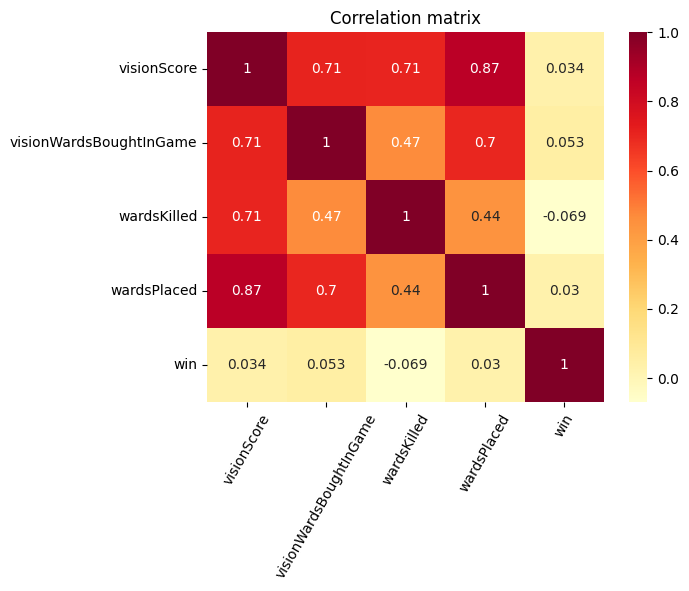

In [12]:
# correlation matrix of vision score
corr_matrix = df.corr()
# cmap = sns.diverging_palette(250, 210, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")
plt.title("Correlation matrix")
plt.xticks(rotation=60)

Text(0.5, 0.98, 'Histogram of numerical variables')

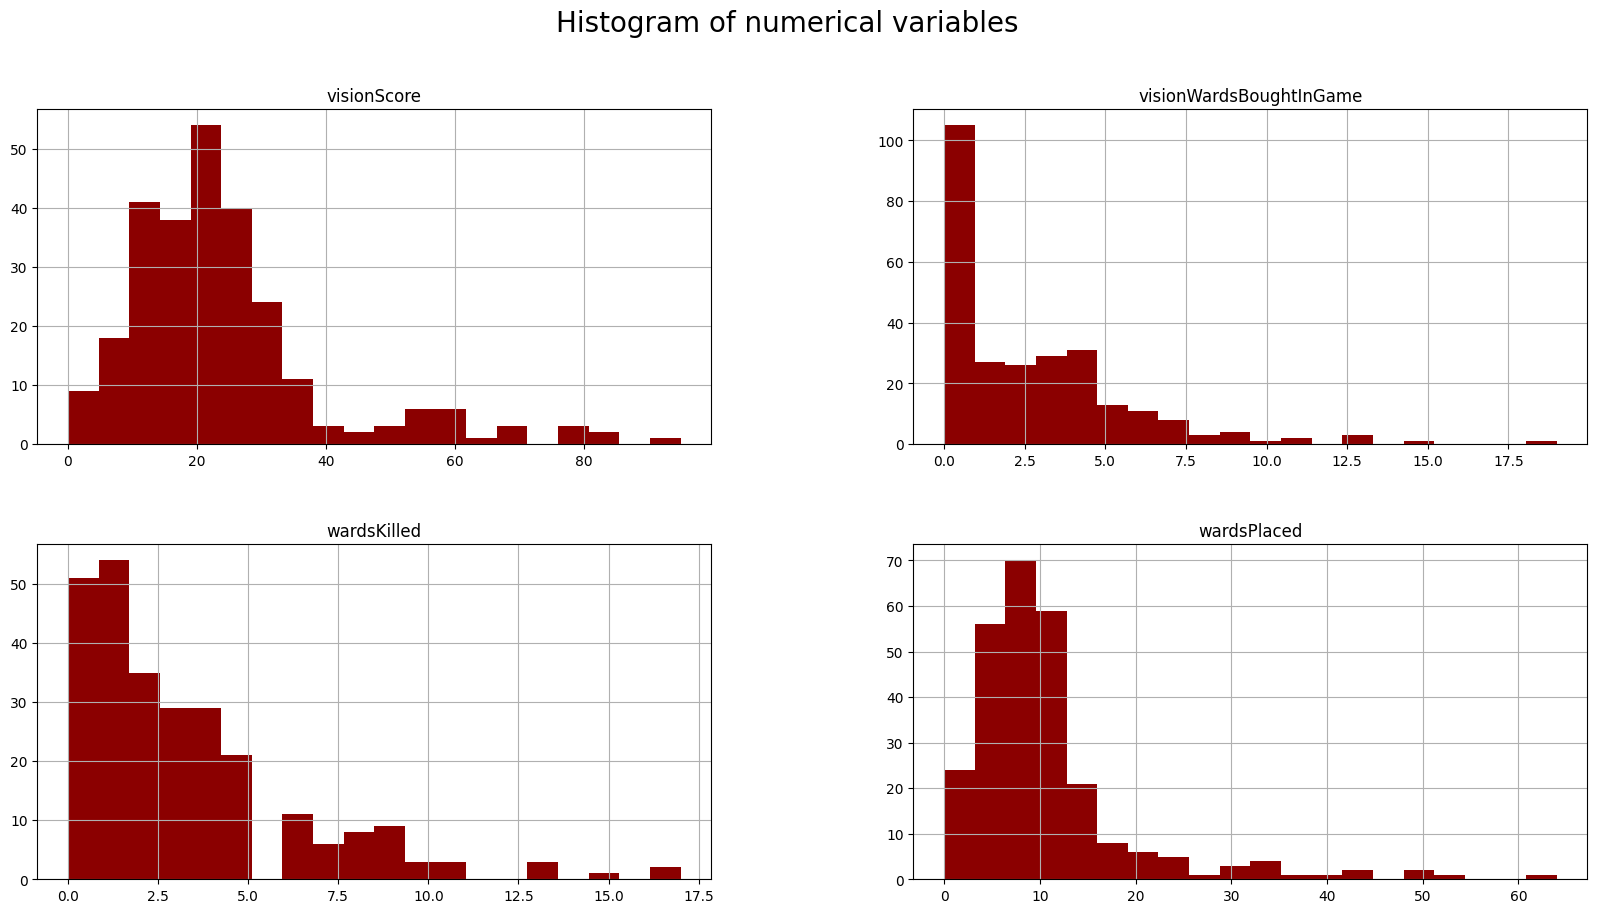

In [13]:
# hist of numerics
df.hist(bins=20, figsize=(20, 10), color='darkred')
plt.suptitle("Histogram of numerical variables", fontsize=20)

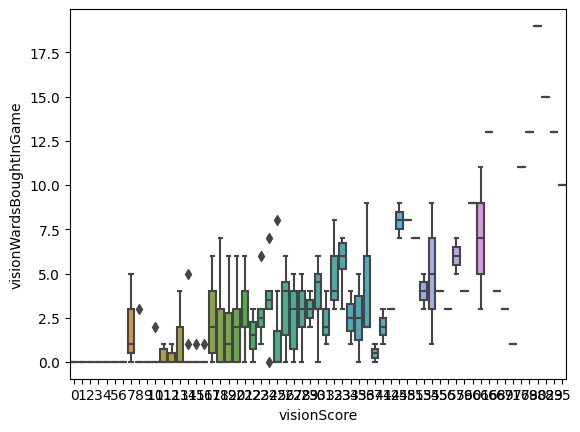

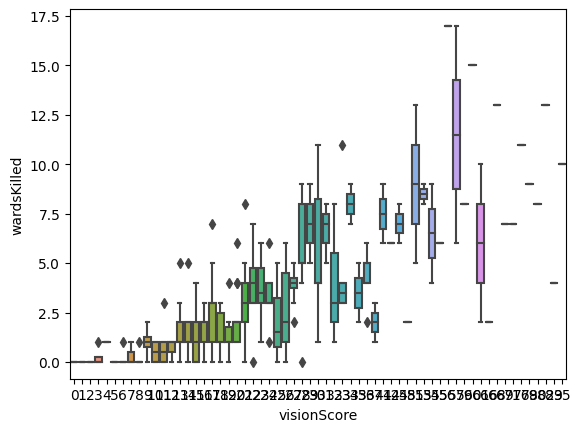

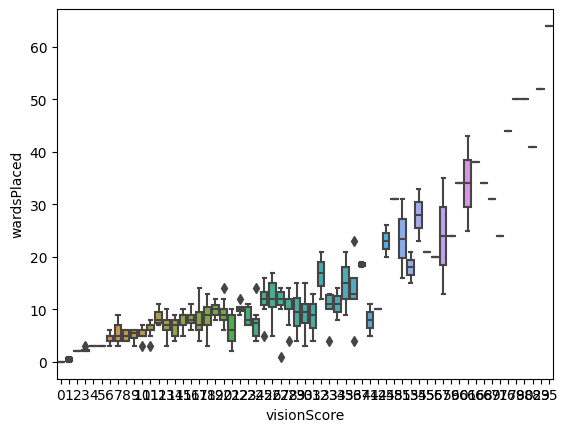

In [14]:
# kinda useless IMO
# Plot boxplots of numerical variables by category
for col in df.select_dtypes(include=[np.number]).columns:
    if col != "visionScore":
        sns.boxplot(x="visionScore", y=col, data=df)
        plt.show()

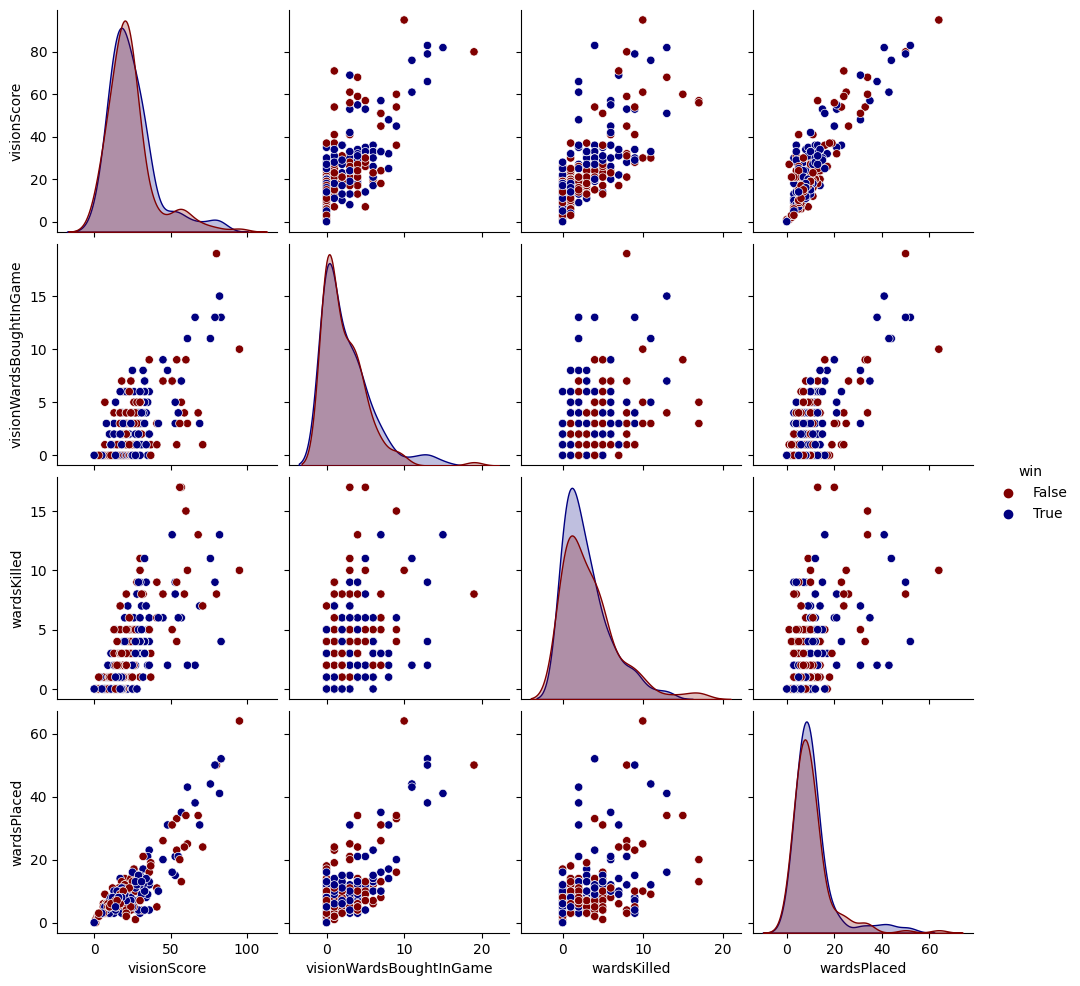

In [15]:
# Plot scatterplot matrix of numerical variables
colors = ['#800000', '#000080']
sns.pairplot(df, vars=df.select_dtypes(include=[np.number]).columns, hue="win", palette=colors)

In [16]:
# calculate the average values for each of the numerical features for each position


# calculate the average values for each position
position_avg = df.groupby('teamPosition').mean()[['visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced']]

print("Average values for each position:")
print(position_avg)


Average values for each position:
              visionScore  visionWardsBoughtInGame  wardsKilled  wardsPlaced
teamPosition                                                                
BOTTOM          23.345455                 2.709091     3.963636    10.036364
JUNGLE          24.327869                 3.524590     3.491803     7.459016
MIDDLE          20.326531                 1.530612     2.469388     9.551020
TOP             14.416667                 0.180556     1.583333     7.125000
UTILITY         56.714286                 6.785714     6.071429    30.464286


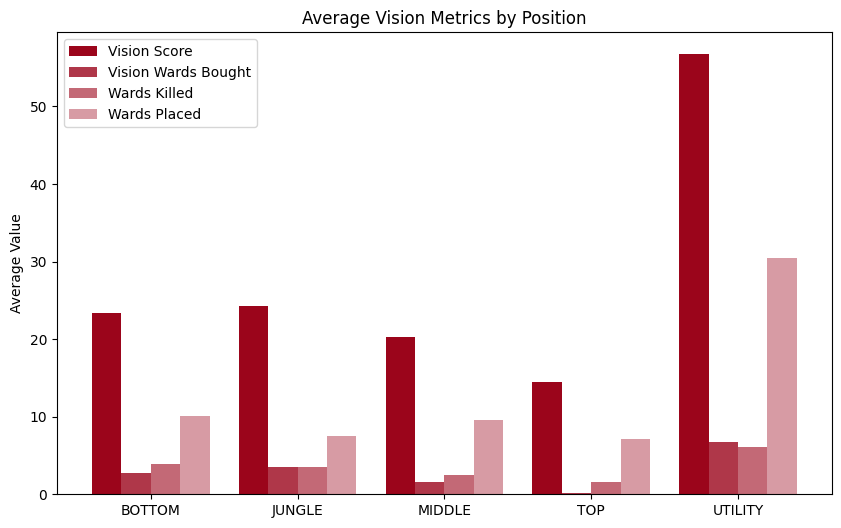

In [17]:
# graphing previous info
# Calculate the average values for each position
position_avg = df.groupby('teamPosition').mean()[['visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced']]

# Set up the data for the bar chart
labels = position_avg.index
vision_score = position_avg['visionScore']
wards_bought = position_avg['visionWardsBoughtInGame']
wards_killed = position_avg['wardsKilled']
wards_placed = position_avg['wardsPlaced']
x = np.arange(len(labels))
width = 0.2

# Set up the colors for each feature
colors = ['#9b051b', '#af3749', '#c36976', '#d79ba4']

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5 * width, vision_score, width, label='Vision Score', color=colors[0])
rects2 = ax.bar(x - 0.5 * width, wards_bought, width, label='Vision Wards Bought', color=colors[1])
rects3 = ax.bar(x + 0.5 * width, wards_killed, width, label='Wards Killed', color=colors[2])
rects4 = ax.bar(x + 1.5 * width, wards_placed, width, label='Wards Placed', color=colors[3])

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Average Value')
ax.set_title('Average Vision Metrics by Position')
ax.legend()

# Show the plot
plt.show()



In [18]:
# calculate the average values for each numerical feature for games that were won and lost


# Calculate the average values for games that were won and lost
games_won = df[df["win"] == 1]
games_lost = df[df["win"] == 0]

avg_visionScore_won = games_won["visionScore"].mean()
avg_visionWardsBoughtInGame_won = games_won["visionWardsBoughtInGame"].mean()
avg_wardsKilled_won = games_won["wardsKilled"].mean()
avg_wardsPlaced_won = games_won["wardsPlaced"].mean()

avg_visionScore_lost = games_lost["visionScore"].mean()
avg_visionWardsBoughtInGame_lost = games_lost["visionWardsBoughtInGame"].mean()
avg_wardsKilled_lost = games_lost["wardsKilled"].mean()
avg_wardsPlaced_lost = games_lost["wardsPlaced"].mean()

print("Games won: visionScore = {:.2f}, visionWardsBoughtInGame = {:.2f}, wardsKilled = {:.2f}, wardsPlaced = {:.2f}".format(avg_visionScore_won, avg_visionWardsBoughtInGame_won, avg_wardsKilled_won, avg_wardsPlaced_won))
print("Games lost: visionScore = {:.2f}, visionWardsBoughtInGame = {:.2f}, wardsKilled = {:.2f}, wardsPlaced = {:.2f}".format(avg_visionScore_lost, avg_visionWardsBoughtInGame_lost, avg_wardsKilled_lost, avg_wardsPlaced_lost))

Games won: visionScore = 24.64, visionWardsBoughtInGame = 2.58, wardsKilled = 2.94, wardsPlaced = 10.98
Games lost: visionScore = 23.55, visionWardsBoughtInGame = 2.26, wardsKilled = 3.38, wardsPlaced = 10.45


In [5]:
# continue with previous data by graphing

# Calculate average values for games won and lost
games_won_avg = games_won[["visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced"]].mean()
games_lost_avg = games_lost[["visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced"]].mean()

# Create a bar graph for the average values
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.3
ax.bar(np.arange(4), games_won[["visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced"]].mean(), label="Wins", alpha=0.8, width=bar_width, color='#05319b')
ax.bar(np.arange(4) + bar_width, games_lost[["visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced"]].mean(), label="Losses", alpha=0.8, width=bar_width, color='#9b0508')
ax.set_xticks(np.arange(4) + bar_width/2)
ax.set_xticklabels(["visionScore", "visionWardsBoughtInGame", "wardsKilled", "wardsPlaced"])
ax.set_xlabel("Numerical Features")
ax.set_ylabel("Average Values")
ax.set_title("Average Vision Metrics for Games Won and Lost")
ax.legend()
plt.show()

NameError: ignored

In [6]:
# This code calculates the win and loss rate for each teamPosition's visionScore, and then calculates the win/loss ratio for each teamPosition. The results are stored in a new DataFrame called vision_score_rate.

###FIXME:/// START HERE

# Calculate win and loss rate for each teamPosition's visionScore
df['win_rate'] = np.where(df['win'] == 1, 1, 0)  # create a new column for win rate
df['loss_rate'] = np.where(df['win'] == 0, 1, 0)  # create a new column for loss rate
vision_score_rate = df.groupby('teamPosition')['visionScore', 'win_rate', 'loss_rate'].mean()
vision_score_rate['win_loss_ratio'] = vision_score_rate['win_rate'] / vision_score_rate['loss_rate']
print(vision_score_rate)


NameError: ignored

In [7]:
df

NameError: ignored

In [48]:
# Group the data by teamPosition and visionScore
grouped = df.groupby(['teamPosition', pd.cut(df['visionScore'], bins=range(0, 200, 20))])

# Calculate the mean of win, loss, and visionScore columns for each group
result = grouped.agg({'win': 'mean', 'visionScore': 'mean', 'win_loss': 'first'})

# Rename the columns to match the desired output
result = result.rename(columns={'win': 'win_rate', 'visionScore': 'Vision Score'})

# Print the results
print("Average win/loss rate and vision score by teamPosition and visionScore:")
print(result)


Average win/loss rate and vision score by teamPosition and visionScore:
                          win_rate  Vision Score win_loss
teamPosition visionScore                                 
BOTTOM       (0, 20]      0.428571     13.476190      win
             (20, 40]     0.483871     26.870968     loss
             (40, 60]     0.333333     56.000000     loss
             (60, 80]          NaN           NaN      NaN
             (80, 100]         NaN           NaN      NaN
             (100, 120]        NaN           NaN      NaN
             (120, 140]        NaN           NaN      NaN
             (140, 160]        NaN           NaN      NaN
             (160, 180]        NaN           NaN      NaN
JUNGLE       (0, 20]      0.437500     13.562500     loss
             (20, 40]     0.475000     26.050000      win
             (40, 60]     0.400000     45.000000      win
             (60, 80]          NaN           NaN      NaN
             (80, 100]         NaN           NaN      NaN


# Part C: Data Storytelling